# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv('env.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
btc_amount = 1.2
eth_amount = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [6]:
# Fetch current BTC price
btc_current_price = requests.get(btc_url).json()
btc_current_price

# Fetch current ETH price
eth_current_price = requests.get(eth_url).json()
eth_current_price

# Compute current value of my crpto
my_btc_value = btc_current_price['data']['1']['quotes']['USD']['price']
my_eth_value = eth_current_price['data']['1027']['quotes']['USD']['price']

total_btc_value = btc_amount * my_btc_value
total_eth_value = eth_amount * my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {btc_amount} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth_amount} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42321.00
The current value of your 5.3 ETH is $2277.58


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 110

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [9]:
# Format current date as ISO format
current_date = pd.Timestamp("2024-02-02", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol'] =='AGG'].drop('symbol',axis=1)
SPY = df_portfolio[df_portfolio['symbol'] =='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio


AGG                                              \
                           close   high      low trade_count   open   volume   
timestamp                                                                      
2024-02-02 05:00:00+00:00  98.46  98.62  98.2616       32755  98.49  8422487   

                                         SPY                             \
                                vwap   close    high    low trade_count   
timestamp                                                                 
2024-02-02 05:00:00+00:00  98.410635  494.35  496.05  489.3      675141   

                                                         
                             open    volume        vwap  
timestamp                                                
2024-02-02 05:00:00+00:00  489.65  99148570  493.006814

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

#  Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.46
Current SPY closing price: $494.35


/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/3528406519.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(df_portfolio['AGG']['close'])
/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/3528406519.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(df_portfolio['SPY']['close'])


In [11]:
# Compute the current value of shares
agg_value = agg_close_price * my_agg
spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 110 SPY shares is $54378.50
The current value of your 200 AGG shares is $19692.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets_data = {'Amount':[agg_value + spy_value, total_btc_value + total_eth_value]}

# Create savings DataFrame

df_savings = pd.DataFrame(assets_data, index = ["Share", "Crypto"], columns =["Amount"])

# Display savings DataFrame
display(df_savings)

,Amount
Share,74070.500
Crypto,62856.374


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='Amount'>

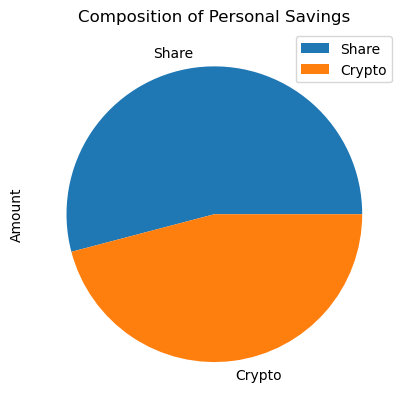

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")
elif total_savings < emergency_fund:
    print("You ${emergency_fund-total_savings} away to reach your emergency fund goal.")


Congratulations! You have enough money in your emergency fund.


/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/1142863721.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  total_savings = float(df_savings.sum())


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe = "1Day"
tickers_historical = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
agg_data = tickers_historical[tickers_historical['symbol'] =='AGG'].drop('symbol',axis=1)
spy_data = tickers_historical[tickers_historical['symbol'] =='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_data,spy_data],axis=1, keys=["AGG","SPY"])

# # Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [30]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Monte_Carlo = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [32]:
# Printing the simulation input data
MC_Monte_Carlo.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Monte_Carlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005827,0.998960,1.012339,0.997632,0.998619,1.006978,0.992977,0.994071,0.999880,1.001623,...,1.010450,0.995090,1.003733,0.997438,0.995598,0.991355,0.983886,0.997761,0.983829,0.997666
2,1.006933,0.997117,1.001517,1.004989,0.993297,1.011055,1.001192,1.004829,0.987490,0.994991,...,1.011804,0.978041,1.005300,0.989907,0.989983,0.975831,0.997327,0.991045,0.986779,1.006090
3,1.005481,0.987282,1.007789,1.013662,0.995586,1.007365,0.999335,1.003097,1.001242,0.990169,...,1.004161,0.977735,1.003802,0.988371,0.989547,0.977241,0.992183,0.988757,0.980453,1.001815
4,1.006207,0.989245,1.009885,1.001840,0.995504,1.007823,0.998298,1.010148,0.989980,0.981998,...,0.985806,0.977920,0.988399,0.985483,0.987681,0.978148,0.990615,0.999219,0.985734,1.012033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.370481,4.102074,28.587937,26.516834,15.607376,11.215208,18.606211,23.357595,24.887097,3.206042,...,16.015751,11.444244,7.073088,22.063615,22.608057,7.652483,18.777455,13.242549,10.613156,17.436359
7557,16.376913,4.072409,28.412159,26.481370,15.838633,11.176051,18.742562,23.335068,24.622890,3.222567,...,16.039845,11.450335,7.055750,21.869921,22.745414,7.712162,18.515194,13.161866,10.581159,17.342614
7558,16.560243,4.086500,28.156796,26.266005,15.806339,11.057984,18.661969,23.059059,24.433669,3.218534,...,16.076943,11.477248,7.002079,21.997285,22.780412,7.684474,18.565281,13.244225,10.597174,17.367217
7559,16.594911,4.114345,28.157078,26.223829,15.734394,11.027393,18.718371,23.057315,24.050281,3.217636,...,15.931237,11.632360,7.047238,22.196075,22.765284,7.729921,18.484806,13.241735,10.568470,17.444721


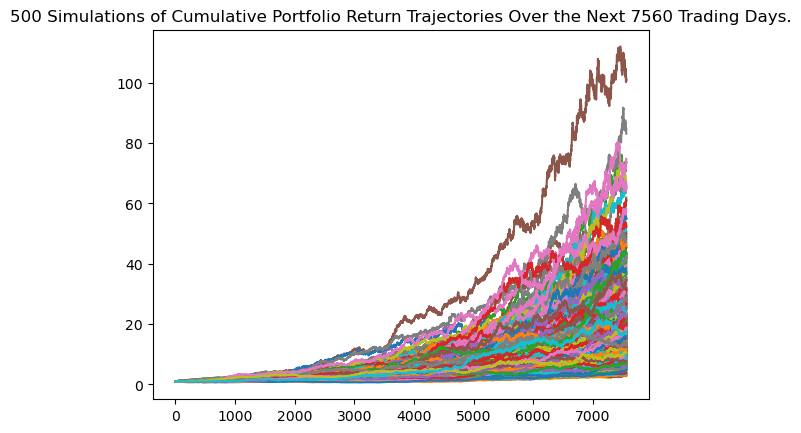

In [37]:
# Plot simulation outcomes
line_plot = MC_Monte_Carlo.plot_simulation()

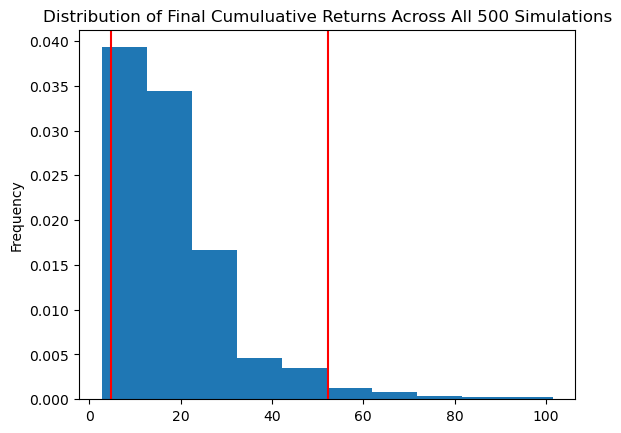

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Monte_Carlo.plot_distribution()

### Retirement Analysis

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = pd.concat([MC_Monte_Carlo.simulated_return.iloc[-1].describe(), MC_Monte_Carlo.confidence_interval.rename(index={"lower": "95% CI Lower", "upper": "95% CI Upper"})])
# Print summary statistics
print(tbl)

count           500.000000
mean             18.715156
std              12.928901
min               2.722534
25%              10.052120
50%              15.339781
75%              22.905082
max             101.468476
95% CI Lower      4.756477
95% CI Upper     52.304311
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [123]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95129.54 and $1046086.22


/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/3566081428.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(tbl[8]*initial_investment,2)
/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/3566081428.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(tbl[9]*initial_investment,2)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [122]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $142694.31 and $1569129.33


/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/2284994686.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(tbl[8]*30000,2)
/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/2284994686.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(tbl[9]*30000,2)


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [96]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns 
mc_fiveyears = MCSimulation(
    portfolio_data=df_stock_data ,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [98]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003601,1.000611,0.999064,0.997427,0.998194,0.994599,1.003683,0.995022,1.000535,1.000395,...,0.998976,1.002275,1.001791,0.999453,1.005607,1.003571,0.998161,0.998987,0.998166,1.001112
2,0.999545,1.003168,0.999007,0.998551,0.997464,0.996507,1.002403,0.996296,1.000146,1.001223,...,0.997783,1.001042,1.005440,1.000037,1.002437,1.000346,0.999881,0.999064,0.991033,1.003358
3,0.997036,1.005615,0.993880,1.001239,0.994560,0.991684,1.004389,0.997060,0.998989,1.002392,...,1.001337,0.995419,0.998805,0.998850,1.002793,1.004171,1.004557,1.000152,0.992625,1.001862
4,0.994440,1.006965,0.992125,1.002596,0.997889,0.992724,1.008047,0.999385,0.997637,1.000466,...,1.004749,0.998722,0.997530,1.000733,1.002981,1.006890,1.002642,0.999376,0.988909,1.001805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.170872,1.105193,1.233058,1.043255,1.088384,1.077367,1.000209,0.945580,1.068908,1.019902,...,1.152414,1.165643,1.173712,1.473236,1.130890,1.397508,1.185577,1.074595,1.123648,1.167158
1257,1.170633,1.104599,1.236705,1.044012,1.087691,1.076705,1.000288,0.948836,1.068546,1.021507,...,1.151309,1.174375,1.180992,1.477041,1.129008,1.399892,1.186468,1.073953,1.121598,1.162746
1258,1.173264,1.108653,1.239029,1.047608,1.090330,1.077108,1.001633,0.949607,1.068906,1.019896,...,1.147908,1.173283,1.176638,1.475233,1.134161,1.403978,1.186923,1.072416,1.121432,1.165345
1259,1.176382,1.106125,1.245065,1.045076,1.089299,1.076887,1.004694,0.954699,1.069794,1.019226,...,1.148914,1.171593,1.178644,1.478597,1.137370,1.407352,1.183638,1.073852,1.122408,1.160097


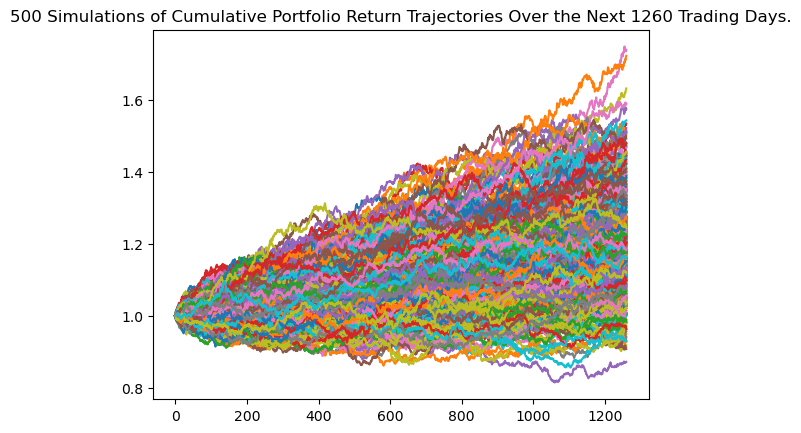

In [100]:
# Plot simulation outcomes
line_plot = mc_fiveyears.plot_simulation()

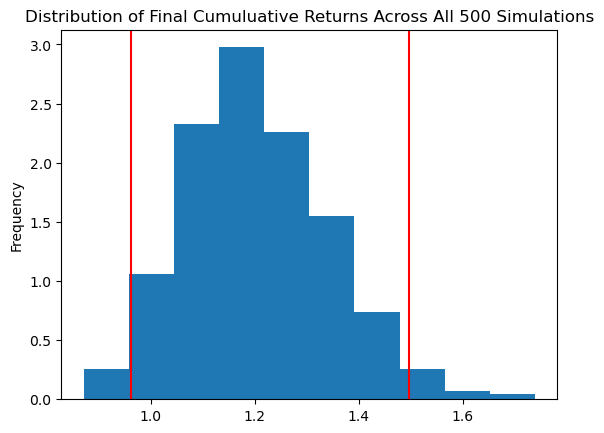

In [101]:
# Plot probability distribution and confidence intervals
dis_plot = mc_fiveyears.plot_distribution()

In [131]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_fiveyears = pd.concat([mc_fiveyears.simulated_return.iloc[-1].describe(), mc_fiveyears.confidence_interval.rename(index={"lower": "95% CI Lower", "upper": "95% CI Upper"})])

# Print summary statistics
print(tbl_fiveyears)

count    500.000000
mean       1.204156
std        0.137669
min        0.871708
25%        1.110225
50%        1.192306
75%        1.288820
max        1.738593
0.025      0.962852
0.975      1.495700
Name: 1260, dtype: float64


In [132]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_fiveyears[8]*initial_investment,2)
ci_upper_five = round(tbl_fiveyears[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $96285.16 and $149570.03


/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/1406272480.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower_five = round(tbl_fiveyears[8]*initial_investment,2)
/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/1406272480.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper_five = round(tbl_fiveyears[9]*initial_investment,2)


### Ten Years Retirement Option

In [133]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_tenyears = MCSimulation(
    portfolio_data=df_stock_data ,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [134]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005198,1.002660,1.002355,0.999564,0.999176,1.001573,0.998998,0.999505,1.004367,1.002562,...,0.999369,1.002226,0.997495,0.997668,0.999421,1.005049,0.997558,1.001500,0.997489,0.997046
2,1.005105,1.001325,1.003203,0.997686,1.000423,1.003849,0.999666,1.001943,1.009742,1.006340,...,0.999735,1.001246,1.001393,0.993321,1.003341,1.000835,0.994484,1.001846,0.996395,1.000097
3,1.010765,1.003814,1.004098,0.999269,1.003021,1.003121,0.997271,1.000158,1.010247,1.005008,...,0.998464,1.004799,1.003830,1.000748,1.003723,0.998388,0.994255,1.000235,0.996029,1.004166
4,1.010057,0.998234,1.006965,0.998669,1.005495,1.000962,0.996191,1.005094,1.002998,1.005035,...,0.998603,1.011466,1.005460,1.001772,1.004530,1.000187,0.995082,0.995017,0.999678,0.999405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.247254,1.140264,1.463725,1.265342,1.545111,1.736823,1.497294,1.589591,1.555151,1.355533,...,1.461421,1.262950,1.387648,1.596837,1.743198,1.746426,1.376230,0.971836,1.396944,1.436899
2517,1.250827,1.139552,1.469314,1.267205,1.547162,1.747752,1.495846,1.589801,1.553356,1.358461,...,1.458668,1.263004,1.384022,1.590423,1.749416,1.745098,1.377751,0.970019,1.399950,1.439269
2518,1.250138,1.135417,1.472983,1.272425,1.549800,1.751350,1.499895,1.579291,1.548957,1.357453,...,1.460080,1.261741,1.385338,1.595270,1.755665,1.749075,1.376450,0.970693,1.400366,1.427363
2519,1.251421,1.137116,1.465943,1.267476,1.550198,1.749918,1.512506,1.570139,1.554872,1.363525,...,1.457697,1.262873,1.385821,1.598026,1.761088,1.744947,1.383590,0.972197,1.395299,1.432711


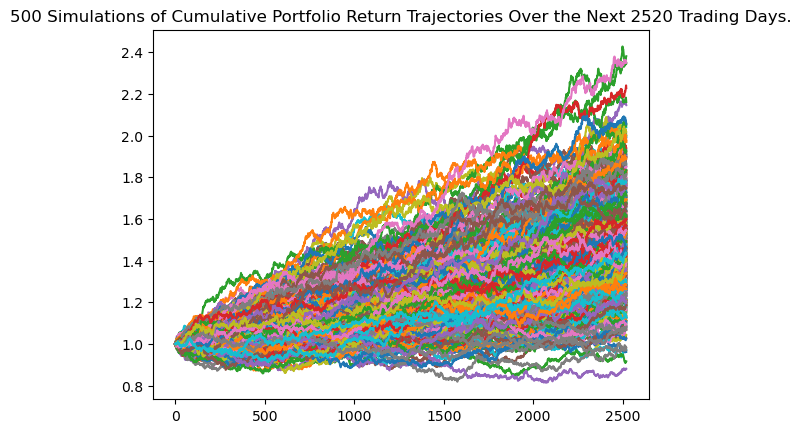

In [135]:
# Plot simulation outcomes
line_plot_tenyears = mc_tenyears.plot_simulation()

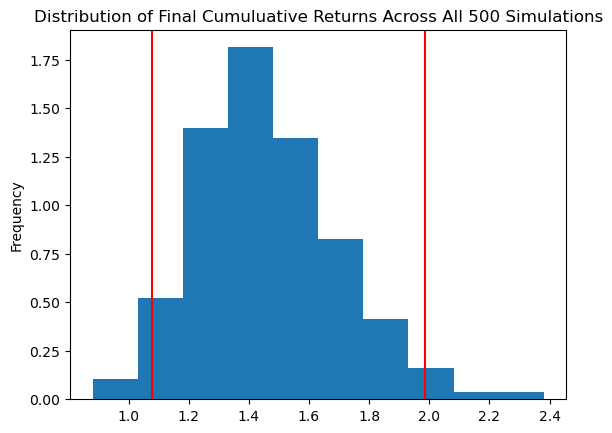

In [136]:
# Plot probability distribution and confidence intervals
dist_plot_tenyears = mc_tenyears.plot_distribution()

In [137]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_tenyears = pd.concat([mc_tenyears.simulated_return.iloc[-1].describe(), mc_tenyears.confidence_interval.rename(index={"lower": "95% CI Lower", "upper": "95% CI Upper"})])

# Print summary statistics
print(tbl_tenyears)

count    500.000000
mean       1.464547
std        0.238463
min        0.881250
25%        1.293483
50%        1.432576
75%        1.610975
max        2.380532
0.025      1.077724
0.975      1.984808
Name: 2520, dtype: float64


In [138]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_tenyears[8]*initial_investment,2)
ci_upper_ten = round(tbl_tenyears[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $107772.39 and $198480.79


/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/3875238465.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower_ten = round(tbl_tenyears[8]*initial_investment,2)
/var/folders/ck/b7zpj9j91t155pgm1ndz1w5c0000gn/T/ipykernel_30362/3875238465.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper_ten = round(tbl_tenyears[9]*initial_investment,2)
